In [2]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np
# Read all objects from the pickle file

with open("gpt2icedata.pkl", "rb") as f:
    gpt2Ice = pickle.load(f)

with open("neoicedata.pkl", "rb") as f:
    neoIce = pickle.load(f)

with open("t5icedata.pkl", "rb") as f:
    t5Ice = pickle.load(f)

Summary Statistics: Instead of visualizing individual ICE curves, 
you can summarize the results of the analysis using statistics such as
mean, median, or quartiles of the predictions across different values of 
the input feature.

Partial Dependence Plot (PDP): Similar to ICE plots but aggregated across all 
instances, PDPs display the average predictions of the model as a function of a
single input feature, while holding other features constant at their average 
values or at specified levels.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Function to plot array from dictionary
def plot_array_from_dict(dictionary, modelName):
    
    # Define the number of rows and columns for the subplot grid
    num_plots = len(dictionary)
    num_rows = 4  # Changed to 4
    num_cols = int(np.ceil(num_plots / num_rows))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 23))
    superplot_ax = fig.add_subplot(111, frameon=False)  # Create a superplot axes
    
    for i, (key, ax) in enumerate(zip(dictionary.keys(), axes.flatten())):
        # Retrieve array of tensors from dictionary
        tensor_arrays = dictionary[key]
    
        # Convert tensors to numpy arrays
        arrays = np.array([[tensor.item() for tensor in tensor_array] for tensor_array in tensor_arrays])
    
        # Generate x values from 0 to 1 with the same length as arrays
        x = np.linspace(0, 1, arrays.shape[1])
    
        # Calculate and plot the average trend line
        avg_array = np.mean(arrays, axis=0)
        ax.plot(x, avg_array, color='blue', linewidth=2.5, label='Average ' + key.upper())
        median_array = np.median(arrays, axis=0)
        ax.plot(x, median_array, color='green', linestyle=':', linewidth=2.5, marker='o',label='Median ' + key.upper())
    
        # Customize the subplot
        ax.set_xlabel('ICE Value', fontsize=25)  # Increase font size of x-axis label
        ax.set_ylabel('Predicted Class', fontsize=25)  # Increase font size of y-axis label
        ax.legend(loc='lower right')
        ax.set_title(key.upper(), fontsize=25)
        ax.tick_params(axis='both', which='major', labelsize=20)  # Increase font size of tick labels
        ax.set_xticks(np.linspace(0, 1, 11))
        ax.set_yticks([0, 1, 2])
        ax.grid(True)
        ax.xaxis.label.set_size(25)  # Set the font size of x-axis label
        ax.yaxis.label.set_size(30)  # Set the font size of y-axis label
        ax.set_ylim(0, 2)
        ax.set_xlim(0, 1)

    
    
    # Hide the superplot axes
    superplot_ax.set_xticks([])
    superplot_ax.set_yticks([])
    
    # Add a title to the entire figure
    fig.suptitle(modelName + ' Quality Factor ICE values', fontsize=40)
    
    # Adjust layout to prevent overlap of subplots and increase space at the bottom
    plt.subplots_adjust(bottom=0.1, hspace=-0.3)  # Adjust the spacing between rows
    plt.tight_layout()  # Set the layout to accommodate the super title
    plt.savefig(modelName+'_ICE_chart.png', bbox_inches='tight', dpi=100)
    # Show plot
    plt.show()



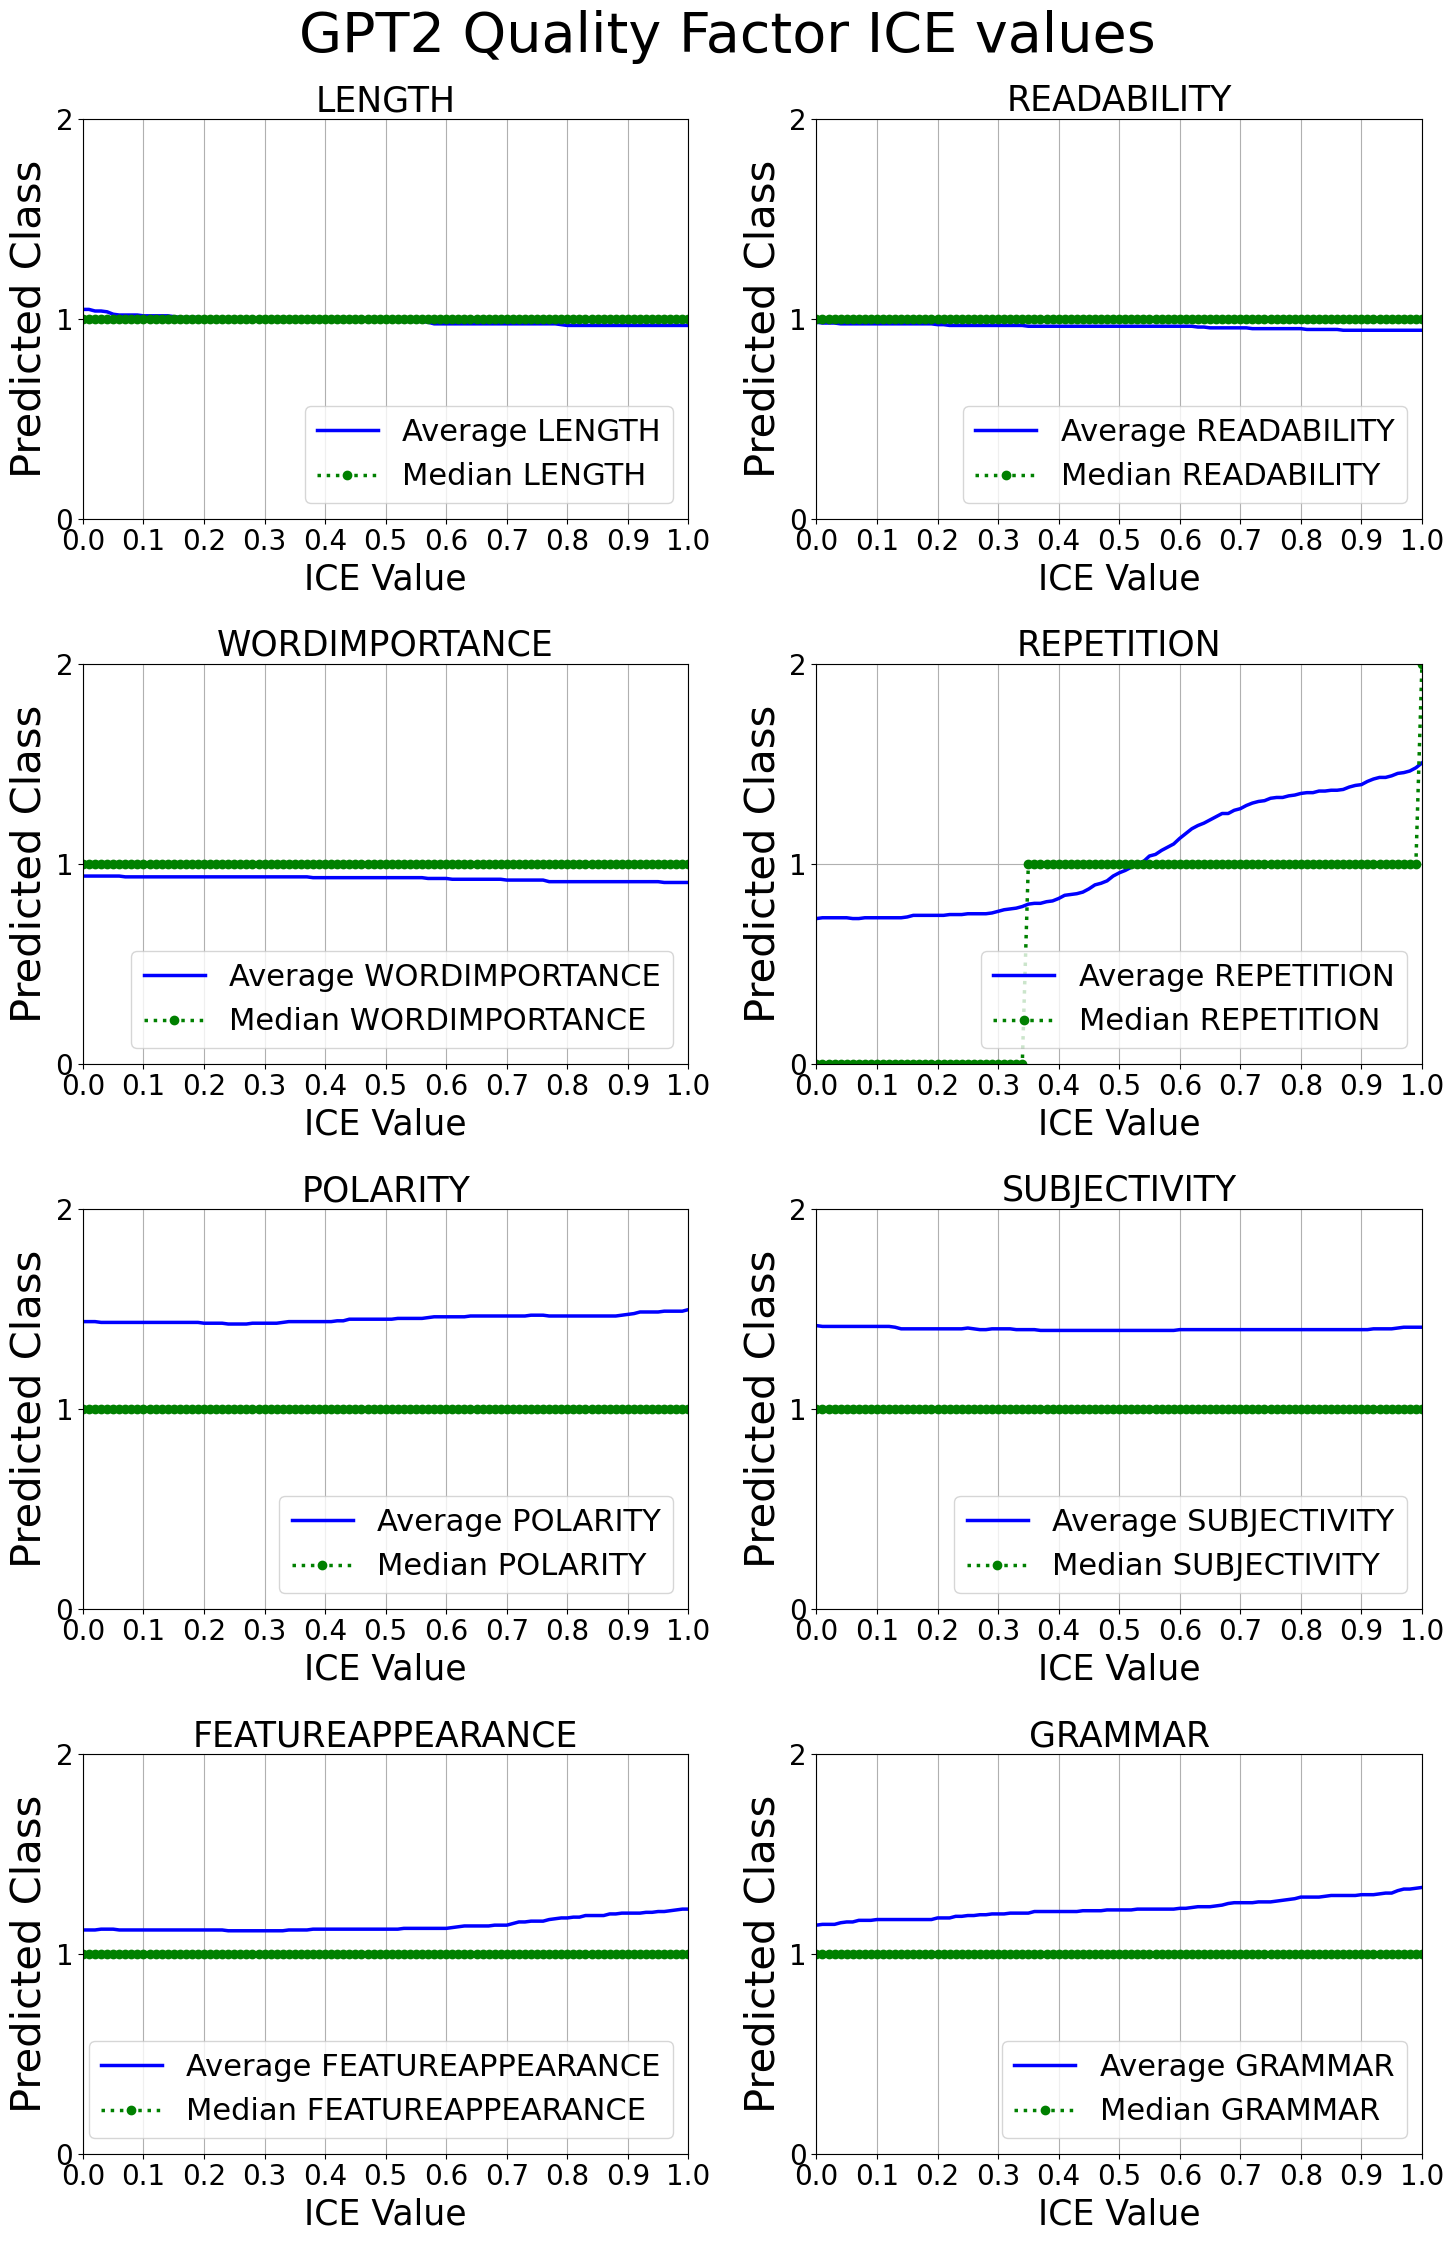

In [56]:
plot_array_from_dict(gpt2Ice, 'GPT2')

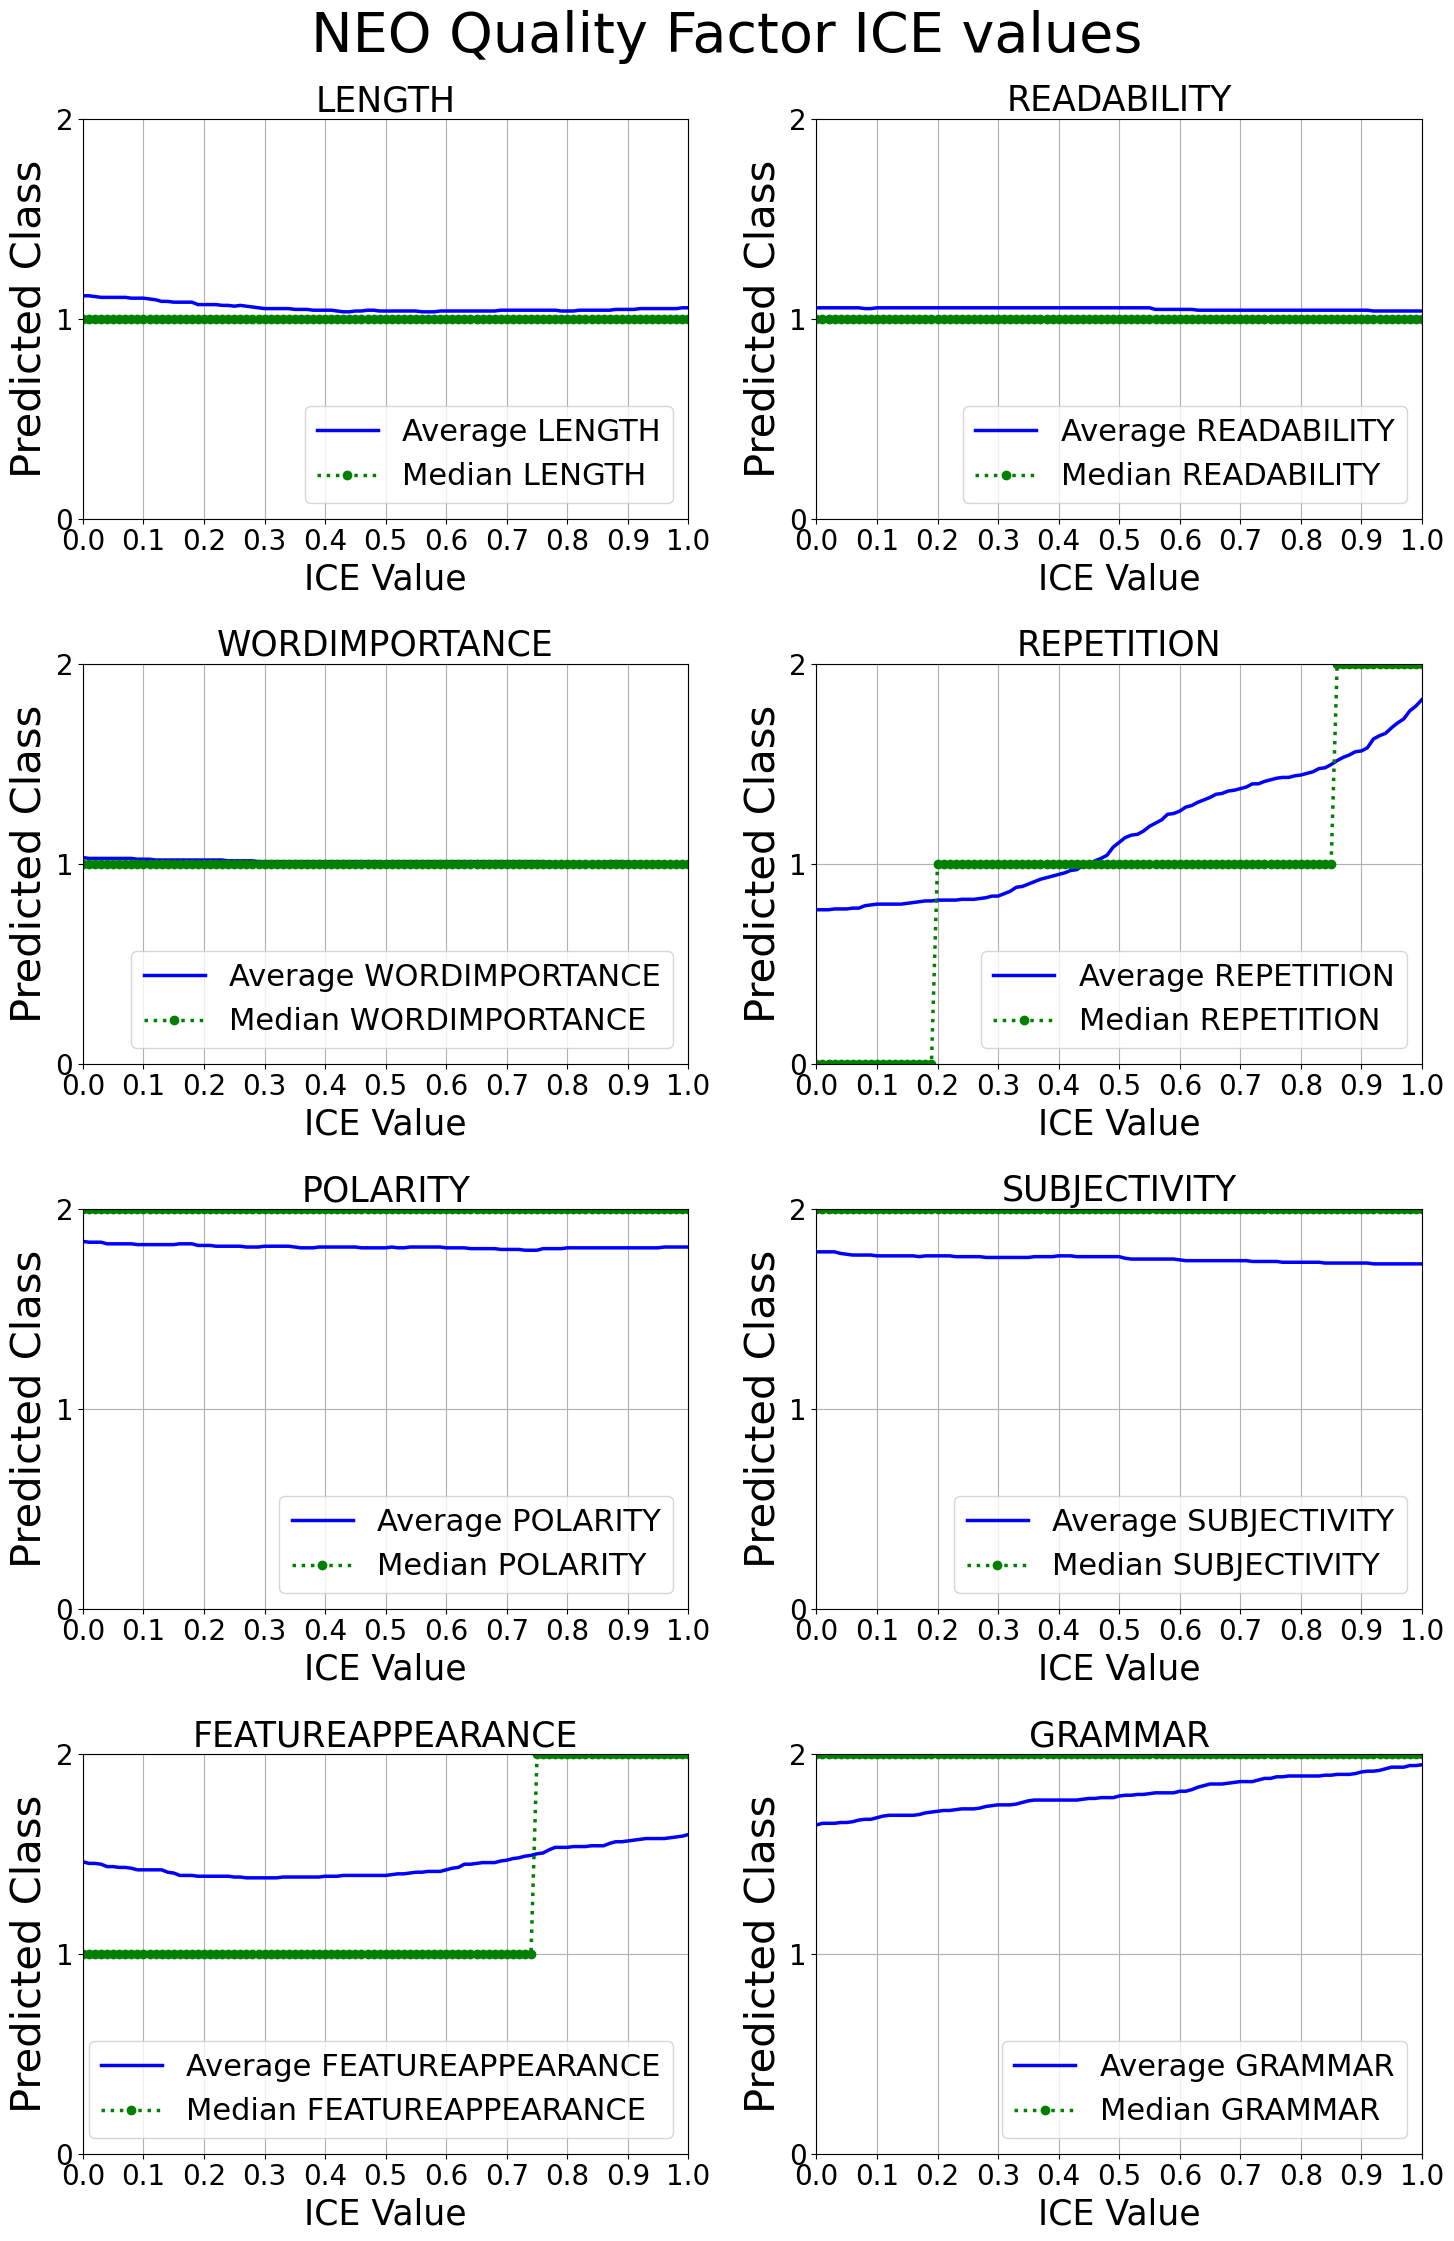

In [57]:
plot_array_from_dict(neoIce, 'NEO')

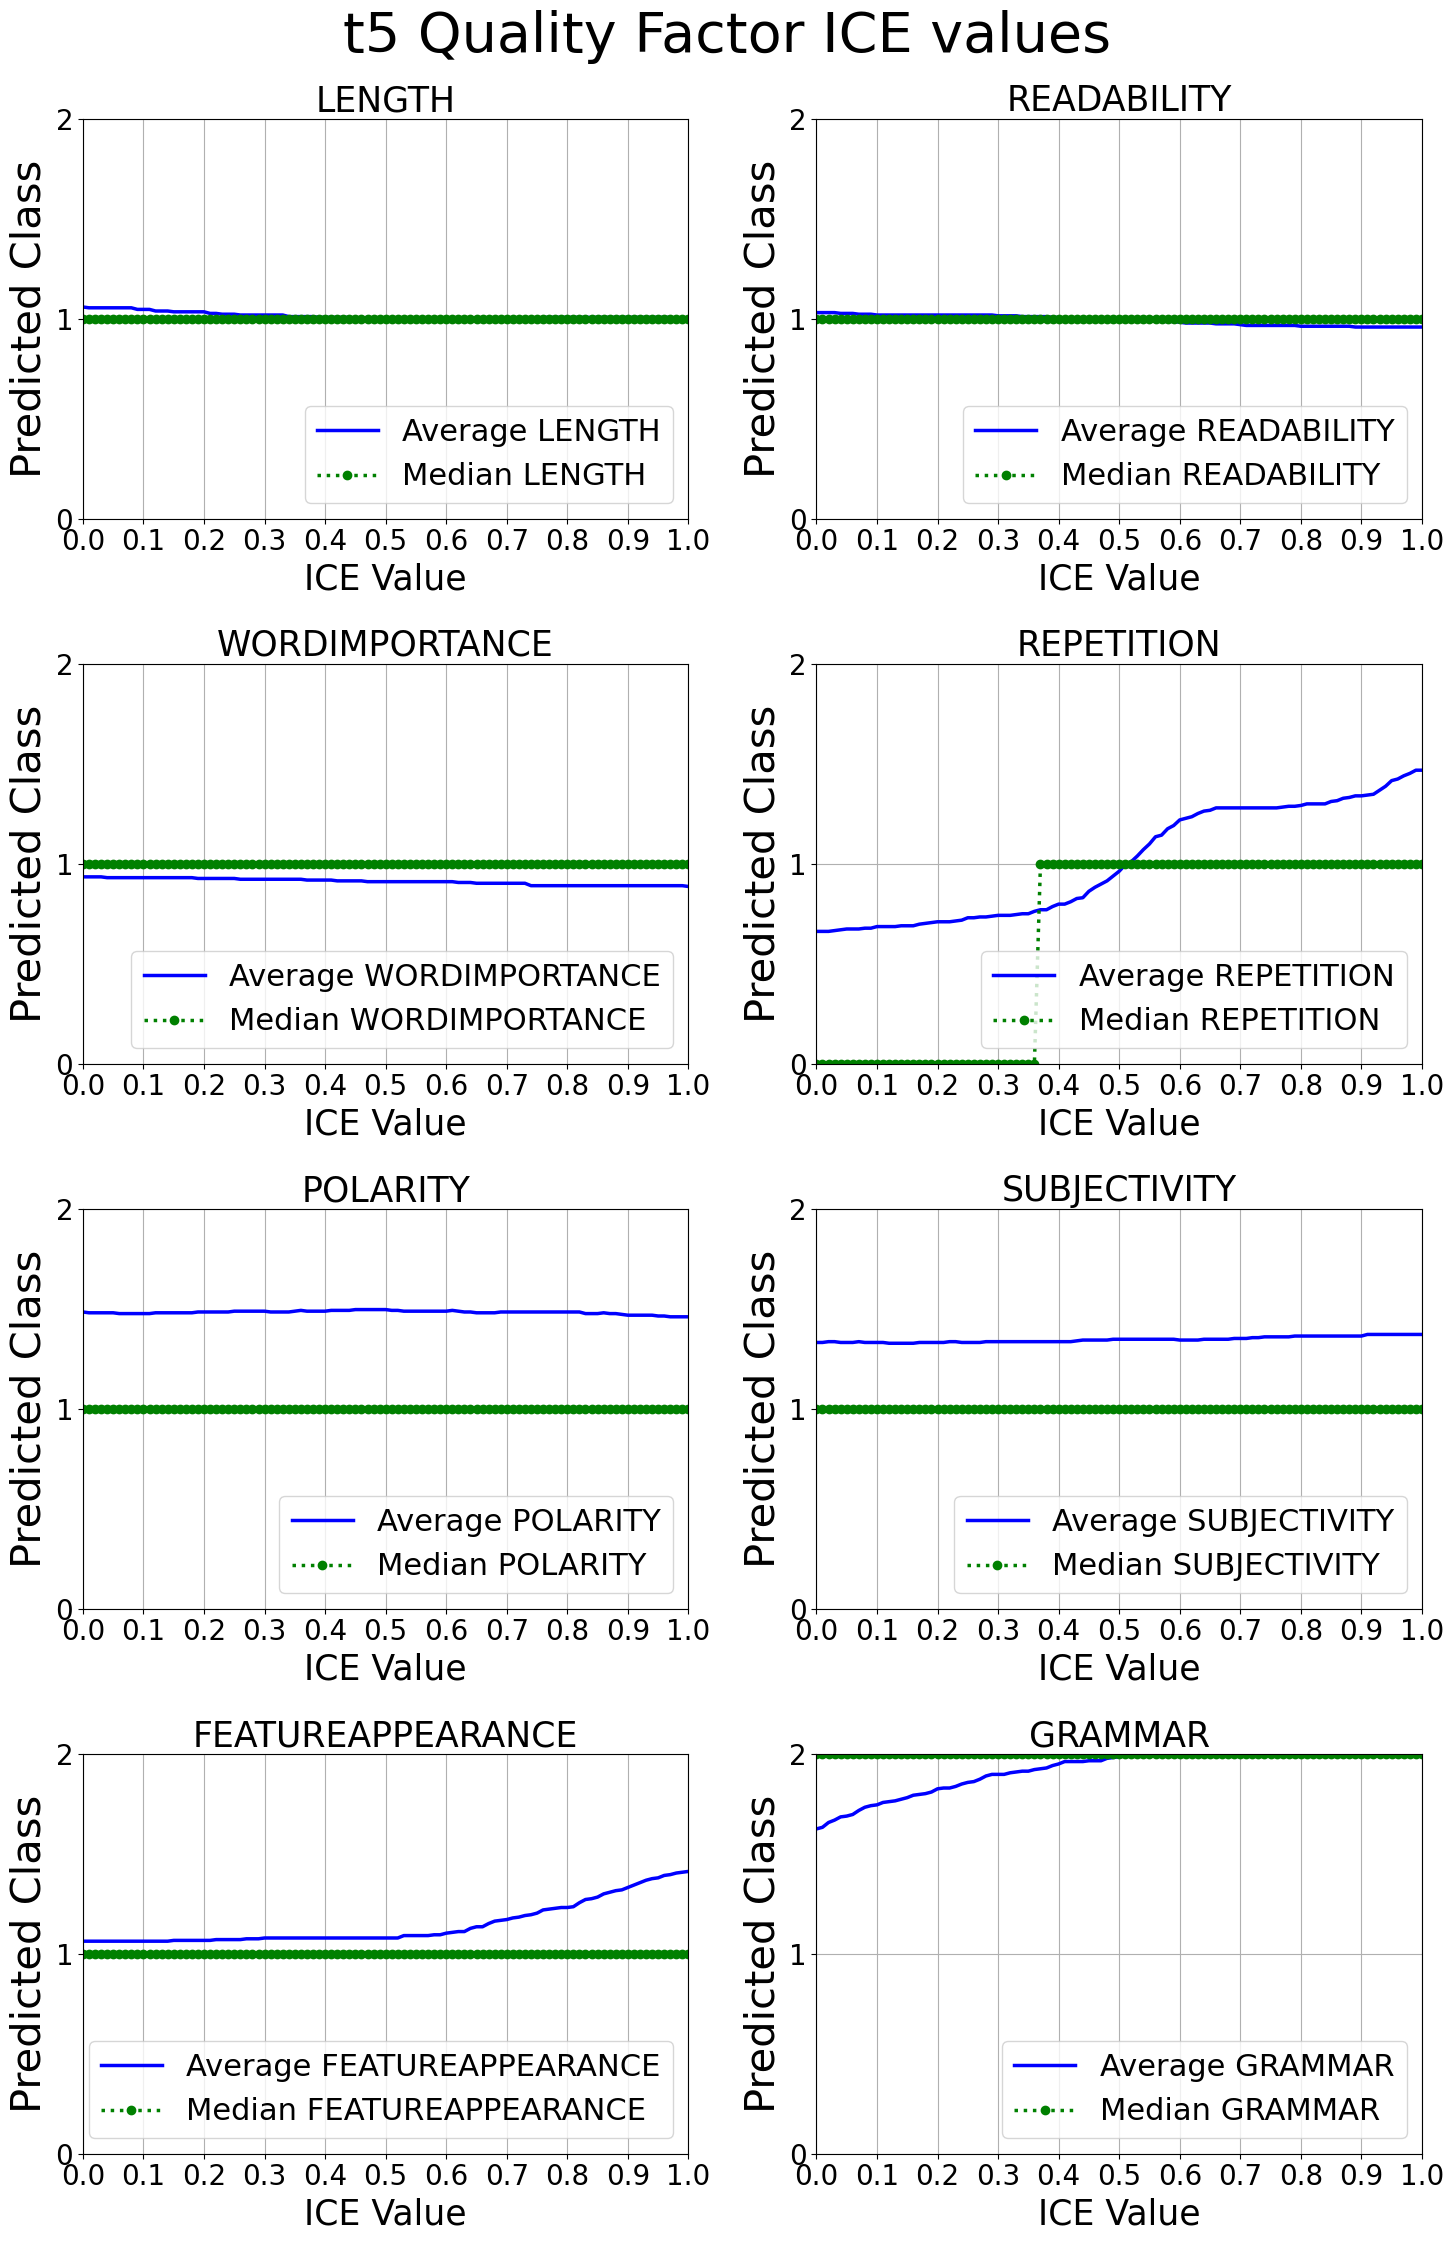

In [58]:
plot_array_from_dict(t5Ice, 't5')